In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score
from hazm import stopwords_list
import pandas as pd
import string
import joblib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('E:\\Uni\\Term 7 - Fall 1402\\Courses\\ML\\Project\\train.csv')

In [3]:
df.head()

,Unnamed: 0,Text,Category
0,0,\nخبرنامه دانشگاه علم و صنعت ايران \nشماره ياز...,Science and Culture
1,1,\nتا پايان سال 1378 دهها زمين فوتبال و \nسالن ...,Sport
2,2,\nانجمن توليدكنندگان تجهيزات صنعت نفت تشكيل شد...,Economy
3,3,\nكرتين براي سومين بار نخست وزير كانادا \nشد \...,Miscellaneous.World News
4,4,\nخداحافظ رفقا \nنمايندگان اروپاي شرقي در جام ...,Sport


In [4]:
del df['Unnamed: 0']

In [5]:
df.head()

,Text,Category
0,\nخبرنامه دانشگاه علم و صنعت ايران \nشماره ياز...,Science and Culture
1,\nتا پايان سال 1378 دهها زمين فوتبال و \nسالن ...,Sport
2,\nانجمن توليدكنندگان تجهيزات صنعت نفت تشكيل شد...,Economy
3,\nكرتين براي سومين بار نخست وزير كانادا \nشد \...,Miscellaneous.World News
4,\nخداحافظ رفقا \nنمايندگان اروپاي شرقي در جام ...,Sport


In [6]:
category_mapping = {
    'Science and Culture': 'artistic and cultural',
    'Sport': 'sports',
    'Economy': 'economic',
    'Miscellaneous.World News': 'miscellaneous',
    'Miscellaneous.Urban': 'miscellaneous',
    'Social.Women': 'social',
    'Social': 'social',
    'Literature and Art': 'artistic and cultural',
    'Politics': 'political',
    'Miscellaneous': 'miscellaneous',
    'Economy.Bank and Bourse': 'economic',
    'Politics.Iran Politics': 'political',
    'Tourism': 'miscellaneous',
    'Social.Religion': 'social',
    'Miscellaneous.Picture': 'miscellaneous',
    'Miscellaneous.Happenings': 'miscellaneous',
    'Science and Culture.Science.Book': 'artistic and cultural',
    'Literature and Art.Art': 'artistic and cultural',
    'Miscellaneous.Islamic Councils': 'miscellaneous',
    'Literature and Art.Art.Cinema': 'artistic and cultural',
    'Science and Culture.Science.Information and Communication Technology': 'technology',
    'Economy.Oil': 'economic',
    'Economy.Commerce': 'economic',
    'Natural Environment': 'miscellaneous',
    'Science and Culture.Science': 'technology',
    'Economy.Industry': 'economic',
    'Economy.Agriculture': 'economic',
    'Sport.World Cup': 'sports',
    'Miscellaneous.Picture.Caricature': 'miscellaneous',
    'Literature and Art.Art.Music': 'artistic and cultural',
    'Literature and Art.Art.Theater': 'artistic and cultural',
    'Economy.Dwelling and Construction': 'economic',
    'Science and Culture.Science.Medicine and Remedy': 'technology',
    'Literature and Art.Literature': 'artistic and cultural'
}

In [7]:
df['Unique Categories'] = df['Category'].map(category_mapping)
del df['Category']

In [8]:
df.head()

,Text,Unique Categories
0,\nخبرنامه دانشگاه علم و صنعت ايران \nشماره ياز...,artistic and cultural
1,\nتا پايان سال 1378 دهها زمين فوتبال و \nسالن ...,sports
2,\nانجمن توليدكنندگان تجهيزات صنعت نفت تشكيل شد...,economic
3,\nكرتين براي سومين بار نخست وزير كانادا \nشد \...,miscellaneous
4,\nخداحافظ رفقا \nنمايندگان اروپاي شرقي در جام ...,sports


In [9]:
def primary_prep_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.replace('،', '') 
    text = ' '.join(text.split()) 
    return text

In [10]:
df['Primary PreProc_Text'] = df['Text'].apply(primary_prep_text)

In [11]:
del df['Text']

In [12]:
df.head()

,Unique Categories,Primary PreProc_Text
0,artistic and cultural,خبرنامه دانشگاه علم و صنعت ايران شماره يازدهم ...
1,sports,تا پايان سال 1378 دهها زمين فوتبال و سالن ورزش...
2,economic,انجمن توليدكنندگان تجهيزات صنعت نفت تشكيل شد ن...
3,miscellaneous,كرتين براي سومين بار نخست وزير كانادا شد ژان ك...
4,sports,خداحافظ رفقا نمايندگان اروپاي شرقي در جام 2002...


In [13]:
stop_words = stopwords_list()
print(stop_words)

['آخرین', 'آقای', 'آمد', 'آمده', 'آمده_است', 'آن', 'آنان', 'آنجا', 'آنها', 'آنچه', 'آنکه', 'آورد', 'آوری', 'آیا', 'ابتدا', 'اثر', 'اجرا', 'اخیر', 'از', 'است', 'اش', 'اغلب', 'افراد', 'افرادی', 'افزود', 'البته', 'اما', 'امر', 'امکان', 'اند', 'او', 'اول', 'اولین', 'اکنون', 'اگر', 'ایشان', 'این', 'اینجا', 'اینکه', 'با', 'بار', 'باره', 'باز', 'باشد', 'باشند', 'باعث', 'بالا', 'باید', 'بخش', 'بخشی', 'بدون', 'بر', 'برابر', 'براساس', 'برای', 'برخی', 'برداری', 'بروز', 'بزرگ', 'بسیار', 'بسیاری', 'بعد', 'بعضی', 'بلکه', 'بنابراین', 'بندی', 'به', 'بهتر', 'بهترین', 'بود', 'بودن', 'بودند', 'بوده', 'بوده_است', 'بی', 'بیان', 'بیرون', 'بیش', 'بیشتر', 'بیشتری', 'بین', 'تا', 'تاکنون', 'تبدیل', 'تحت', 'ترتیب', 'تعداد', 'تعیین', 'تغییر', 'تمام', 'تمامی', 'تنها', 'تهیه', 'تو', 'جا', 'جاری', 'جای', 'جایی', 'جدی', 'جدید', 'جریان', 'جز', 'جمع', 'جمعی', 'حال', 'حالا', 'حالی', 'حتی', 'حد', 'حداقل', 'حدود', 'حل', 'خاص', 'خاطرنشان', 'خصوص', 'خطر', 'خواهد_بود', 'خواهد_شد', 'خواهد_کرد', 'خوب', 'خوبی', 'خود', 'خودش', '

In [14]:
def remove_stopwords(text): 
    if isinstance(text, str): 
        return [token for token in text.split() if token not in stop_words] 
    elif isinstance(text, list): 
        return [token for token in text if token not in stop_words] 
    else: 
        return text

df['PrePrc Texts'] = df['Primary PreProc_Text'].apply(remove_stopwords)

In [15]:
del df['Primary PreProc_Text']

In [16]:
df.head()

,Unique Categories,PrePrc Texts
0,artistic and cultural,"[خبرنامه, دانشگاه, علم, صنعت, ايران, شماره, يا..."
1,sports,"[پايان, سال, 1378, دهها, زمين, فوتبال, سالن, و..."
2,economic,"[انجمن, توليدكنندگان, تجهيزات, صنعت, نفت, تشكي..."
3,miscellaneous,"[كرتين, براي, سومين, وزير, كانادا, ژان, كرتين,..."
4,sports,"[خداحافظ, رفقا, نمايندگان, اروپاي, شرقي, جام, ..."


In [17]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['PrePrc Texts'].apply(' '.join))

In [18]:
joblib.dump(tfidf_vectorizer, 'tfidf_vec.pkl') # save the vectorized TF-IDF to a file

['tfidf_vec.pkl']

In [19]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [20]:
df_tf = pd.concat([df['Unique Categories'], tfidf_df], axis=1)

In [21]:
print(df_tf.head())

       Unique Categories   10  100  1000   11  110   12  120  1200   13  ...  \
0  artistic and cultural  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...   
1                 sports  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...   
2               economic  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...   
3          miscellaneous  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...   
4                 sports  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...   

   گياهان  گياهي  گير  گيران  گيرد  گيرند  گيرنده  گيري  گيريم     گيلان  
0     0.0    0.0  0.0    0.0   0.0    0.0     0.0   0.0    0.0  0.000000  
1     0.0    0.0  0.0    0.0   0.0    0.0     0.0   0.0    0.0  0.103605  
2     0.0    0.0  0.0    0.0   0.0    0.0     0.0   0.0    0.0  0.000000  
3     0.0    0.0  0.0    0.0   0.0    0.0     0.0   0.0    0.0  0.000000  
4     0.0    0.0  0.0    0.0   0.0    0.0     0.0   0.0    0.0  0.000000  

[5 rows x 5001 columns]


In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_tf.drop('Unique Categories', axis=1), df_tf['Unique Categories'], test_size=0.2, random_state=42)

In [23]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [27]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
y_pred = rf_model.predict(X_test)

In [29]:
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"Accuracy: {accuracy} %")

Accuracy: 83.0 %


In [30]:
precision = round(precision_score(y_test, y_pred, average="weighted") * 100, 2) # precision = TP / (TP + FP)
print(f"Precision: {precision} %")

Precision: 83.97 %


In [31]:
recall = round(recall_score(y_test, y_pred, average="weighted") * 100, 2) # recall = TP / (TP + FN)
print(f"Recall: {recall} %")

Recall: 83.0 %


In [32]:
f1 = round(f1_score(y_test, y_pred, average="weighted")* 100, 2) # precision * recall / (precision + recall)
print(f"F1 Score: {f1} %")

F1 Score: 81.95 %


In [33]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(conf_matrix)

Confusion Matrix: 
[[1339   18  732   26   10   10    0]
 [   7 2275  417   34    2    5    0]
 [ 185  152 8406  160   18   24    0]
 [  13   55  510 1694    3    4    0]
 [  82   15  504   68  453   11    0]
 [   4    0   40    3    0 1776    0]
 [  25    9  118    0    0    2    3]]


In [34]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf_model, X_train, y_train, cv=kfold)

In [39]:
print(f"Accuracy:, {round(scores.mean() * 100, 2)} %")

Accuracy:, 82.26 %


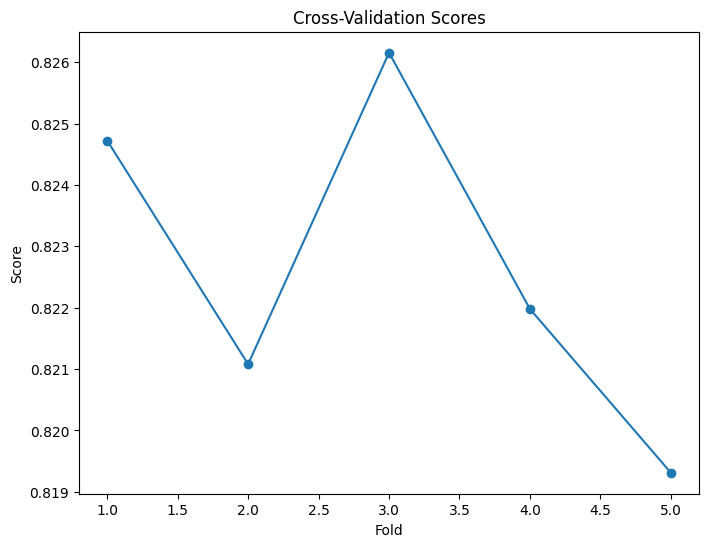

In [40]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-')
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.show()

In [51]:
joblib.dump(rf_model, 'model.pkl') # save the trained model to a file

['model.pkl']